In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [74]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [5]:
ground_cricket_data = {"ChirpsperSecond": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "GroundTemperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)
df

,ChirpsperSecond,GroundTemperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [6]:
df.describe()

,ChirpsperSecond,GroundTemperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


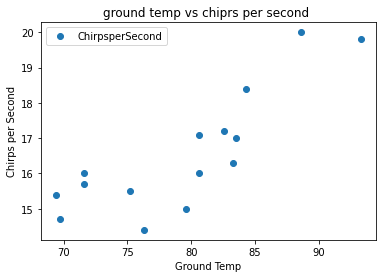

In [8]:
#visual EDA 
df.plot(x='GroundTemperature',y='ChirpsperSecond',style="o")
plt.title("ground temp vs chiprs per second ")
plt.xlabel("Ground Temp")
plt.ylabel('Chirps per Second')
plt.show()

There is a linear relationship between the data which can be represented with the help of a line.

In [9]:
df['GroundTemperature']=df['GroundTemperature'].to_frame()
df['GroundTemperature']

0     88.6
1     71.6
2     93.3
3     84.3
4     80.6
5     75.2
6     69.7
7     71.6
8     69.4
9     83.3
10    79.6
11    82.6
12    80.6
13    83.5
14    76.3
Name: GroundTemperature, dtype: float64

In [11]:
df['ChirpsperSecond']=df['ChirpsperSecond'].to_frame()
df['ChirpsperSecond']

0     20.0
1     16.0
2     19.8
3     18.4
4     17.1
5     15.5
6     14.7
7     15.7
8     15.4
9     16.3
10    15.0
11    17.2
12    16.0
13    17.0
14    14.4
Name: ChirpsperSecond, dtype: float64

# `Modelling`





# Model for algorithm - Chirps per Second = (m * Ground Temperature) + c

In [12]:
X = df['GroundTemperature']
X = X.to_frame()
y = df['ChirpsperSecond']

In [17]:
from sklearn import linear_model
linreg=linear_model.LinearRegression()
linreg.fit(X,y)

LinearRegression()

In [18]:
print('intercept',linreg.intercept_)
print('coff',linreg.coef_)

intercept 0.45931464523595267
coff [0.20299973]


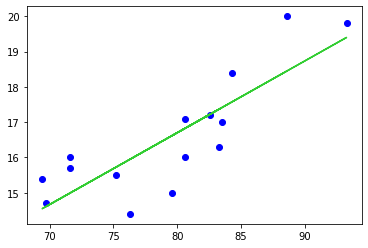

In [22]:
plt.scatter(X,y,color='blue')
plt.plot(X,linreg.predict(X),color='limegreen')

In [23]:
print('R-sq',linreg.score(X,y))

R-sq 0.6922946529146998


### **Extrapolate**

In [25]:
i=float(input())
p=linreg.predict([[i]])
z=int(p.round())
print("If the ground temperature reached ",str(i)," then approximatly we can expect the crickets to be chirping at ", str(z)," chirps per sec.")


82.6
If the ground temperature reached  82.6  then approximatly we can expect the crickets to be chirping at  17  chirps per sec.


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


### **Interpolate**

In [27]:
m=float(input())
c=(m-linreg.intercept_)/(linreg.coef_)
o=int(c.round())
print("If the crickets were chirping at a rate of ",str(m)," chirps per second. then the approximate ground temperature that morning would be", str(o),)

15
If the crickets were chirping at a rate of  15.0  chirps per second. then the approximate ground temperature that morning would be 72


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [29]:
df = pd.read_fwf("brain_body.txt")
df


,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [30]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


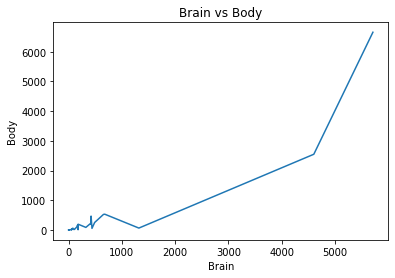

In [36]:
df.groupby('Body')['Brain'].mean().plot()
plt.title('Brain vs Body')
plt.xlabel("Brain")
plt.ylabel("Body")
plt.show()

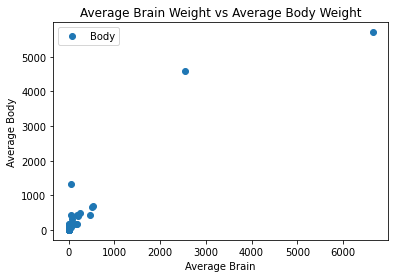

In [37]:
df.plot(x='Brain',y='Body', style="o")
plt.title('Average Brain Weight vs Average Body Weight')
plt.xlabel('Average Brain')
plt.ylabel('Average Body')
plt.show()

In [38]:
df.corr()

,Brain,Body
Brain,1.000000,0.934164
Body,0.934164,1.000000


In [42]:
X=df['Brain']
X=X.to_frame()
y=df['Body']

In [43]:
from sklearn import linear_model
linreg = linear_model.LinearRegression()
linreg.fit(X, y)

LinearRegression()

In [44]:
print('intercept:', linreg.intercept_)
print('coefficient:', linreg.coef_)

intercept: 91.00439620740687
coefficient: [0.96649637]


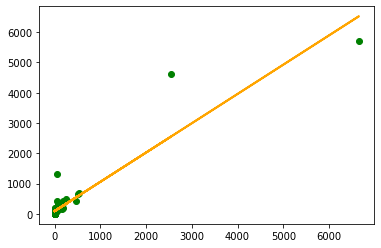

In [45]:
plt.scatter(X, y, color='green')
plt.plot(X, linreg.predict(X), color='orange', linewidth=2)

In [46]:
print('r-squared: ', linreg.score(X, y))

r-squared:  0.8726620843043331


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [48]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [50]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [51]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


## **IQR Method**

### Finding of Interquartile Range And Lower Limit And Upper Limit Method

In [52]:
def outlier_presence(df):
  for i in df.keys():
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    print("Interquartile Range of " + i + " is", IQR)
    print("Lower Limit ", lower_limit)
    print("Upper Limit ", upper_limit)
    outliers = df[(df[i]<lower_limit)|(df[i]>upper_limit)]
    if outliers.shape[0] != 0:
      print("Outlier is Presented In",i )
      print("\n")
    else:
      print("Outlier is Not Presented In",i )
      print("\n")
  
outlier_presence(df)

Interquartile Range of Sex is 1.0
Lower Limit  -1.5
Upper Limit  2.5
Outlier is Not Presented In Sex


Interquartile Range of Rank is 2.0
Lower Limit  -2.0
Upper Limit  6.0
Outlier is Not Presented In Rank


Interquartile Range of Year is 8.0
Lower Limit  -9.0
Upper Limit  23.0
Outlier is Presented In Year


Interquartile Range of Degree is 1.0
Lower Limit  -1.5
Upper Limit  2.5
Outlier is Not Presented In Degree


Interquartile Range of YSdeg is 16.5
Lower Limit  -18.0
Upper Limit  48.0
Outlier is Not Presented In YSdeg


Interquartile Range of Salary is 9011.75
Lower Limit  4729.125
Upper Limit  40776.125
Outlier is Not Presented In Salary




From Above Box Plot And Finding of Interquartile Range We Can Know Outliers Present In Year
To Knowing Outlier Data Points In Our Feature And Target Variable

In [53]:
def Outlier_Data_Points(df):
  for i in df.keys():
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    outliers = df[(df[i]<lower_limit)|(df[i]>upper_limit)] # Here We Find The All outliers In Given Data set
    if outliers.shape[0] != 0:
      print("Outlier is Presented In " + i + " is")
      for j in outliers[i]:
        print(j)
      print("\n")
    else:
      print("No Outlier is Presented In",i )
    # if outliers.empty: 
    #   print("No Outlier is Presented In",i )
    # else:
    #   print("Outlier is Presented In " + i + "is")
    #   for j in outliers[i]:
    #     print(j)
    #   print("\n")
Outlier_Data_Points(df)

No Outlier is Presented In Sex
No Outlier is Presented In Rank
Outlier is Presented In Year is
25


No Outlier is Presented In Degree
No Outlier is Presented In YSdeg
No Outlier is Presented In Salary


### Finding The Relationship Between ("Sex", "Rank", "Year", "Degree", "YSdeg") To "Salary"

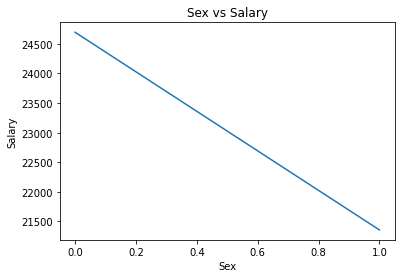

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


In [54]:
df.groupby('Sex')['Salary'].mean().plot()
plt.title('Sex vs Salary')
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.show()

df[['Sex', 'Salary']].corr()

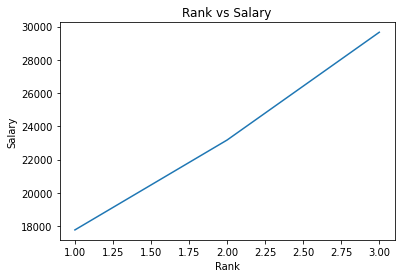

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


In [55]:
#df.plot(x = 'Rank', y='Salary', style = 'o')
df.groupby('Rank')['Salary'].mean().plot()
plt.title('Rank vs Salary')
plt.xlabel('Rank')
plt.ylabel('Salary')
plt.show()

df[['Rank', 'Salary']].corr()

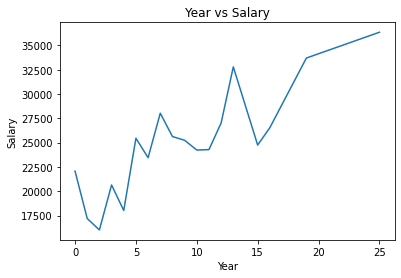

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


In [56]:
df.groupby('Year')['Salary'].mean().plot()
plt.title('Year vs Salary')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.show()

df[['Year', 'Salary']].corr()

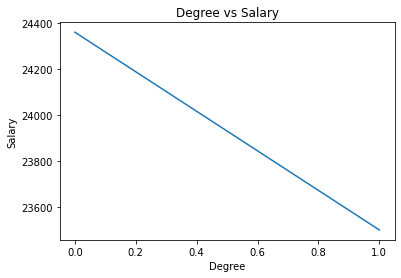

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


In [57]:
df.groupby('Degree')['Salary'].mean().plot()
plt.title('Degree vs Salary')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()

df[['Degree', 'Salary']].corr()

Spliting The Data Set In Train And Test For Developing Models

In [60]:
from sklearn.model_selection import train_test_split
X = df.loc[:, ["Sex", "Rank", "Year", "Degree", "YSdeg"]].values 
y = df.loc[:, 'Salary'].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 7)

In [63]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

Developing The Model

In [64]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()   
regressor.fit(X_train_scaled, y_train)

y_pred = regressor.predict(X_test_scaled) 
y_pred

array([28887.02952781, 29426.57400482, 23074.53644172, 28540.36845393,
       25457.22218901, 21555.98100223, 18962.5998726 , 21372.19690045,
       29866.04049028, 30373.83764927, 16107.69878742, 22869.45858675,
       16429.97095763, 26138.34988493, 15599.90162843, 18976.31516693])

### Developing The Model

In [65]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()   
regressor.fit(X_train_scaled, y_train)

y_pred = regressor.predict(X_test_scaled) 
y_pred

array([28887.02952781, 29426.57400482, 23074.53644172, 28540.36845393,
       25457.22218901, 21555.98100223, 18962.5998726 , 21372.19690045,
       29866.04049028, 30373.83764927, 16107.69878742, 22869.45858675,
       16429.97095763, 26138.34988493, 15599.90162843, 18976.31516693])

In [66]:

New_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
New_df


,Actual,Predicted
0,27959,28887.029528
1,25500,29426.574005
2,22450,23074.536442
3,29342,28540.368454
4,22906,25457.222189
5,23725,21555.981002
6,23713,18962.599873
7,21600,21372.196900
8,27025,29866.040490
9,35350,30373.837649


In [67]:
df_coff = pd.DataFrame(regressor.coef_ , ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg'], columns= ['Cofficient'])
df_coff

,Cofficient
Sex,929.457566
Rank,5310.095498
Year,3112.935207
Degree,-715.662197
YSdeg,-1907.195112


In [68]:
print(regressor.intercept_)

23947.555555555555


In [70]:
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

NameError: ignored



### 2. Find the selection of columns with the best  score.

In [71]:
def Selc_Col(df):
  for i in df.keys():
    if i != 'Salary':
      X = df.loc[:, [i]].values 
      y = df.loc[:, 'Salary'].values 
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 7)
      scaler = StandardScaler() 
      scaler.fit(X_train,y_train) 
      X_train_scaled = scaler.transform(X_train) 
      X_test_scaled = scaler.transform(X_test) 
      regressor = LinearRegression()   
      regressor.fit(X_train_scaled, y_train)
      y_pred = regressor.predict(X_test_scaled) 
      print('R2- SCORE of ' + i + ' is: ', metrics.r2_score(y_test,y_pred))

In [75]:
Selc_Col(df)

R2- SCORE of Sex is:  -0.012233465811496869
R2- SCORE of Rank is:  0.6723218219021224
R2- SCORE of Year is:  0.39359646731694975
R2- SCORE of Degree is:  -0.05577210942642963
R2- SCORE of YSdeg is:  0.3561736731232156



3. Report whether sex is a factor in salary.
### ANS: Here Sex Is Not a Factor for Salary Prediction Because It Have Low Cofficient Value And Low  Score

ANS: Here Sex Is Not a Factor for Salary Prediction Because It Have Low Cofficient Value And Low  Score